# Summary
This demonstrates reconstruction of a Fresnel CDI dataset and compares the result to ePIE reconstruction. 

The probe structure allows reconstruction in CDI mode, i.e. without real-space overlap constraints. 

Scanning CDI reconstruction is also possible here, but results in a lower-quality image because of scan position jitter in this dataset.

In [3]:
from ptycho.workflows.components import (
    parse_arguments,
    setup_configuration,
    load_data,
    run_cdi_example,
    save_outputs,
    logger,
    update_config_from_dict
)

In [4]:
params = {
    "N": 64,
    "probe_scale": 5,
    "nphotons": 1e9,

    'nepochs': 50,
    'output_prefix': 'tmp',
    'nimgs_train': 1,
    'nimgs_test': 1,
    'intensity_scale.trainable': True,
    'positions.provided': True,
    'probe.big': True,
    'probe.mask': False,
    'data_source': 'generic',
    'gridsize': 1,
    'probe_scale': 5,
    'train_data_file': 'train_data.npz',
    'test_data_file': 'test_data.npz',

    # "amp_activation": 'swish'
}

update_config_from_dict(params)

2025-07-01 16:02:52,680 - WARNING - Configuration key 'output_prefix' is not a recognized parameter.
2025-07-01 16:02:52,680 - WARNING - Configuration key 'nimgs_train' is not a recognized parameter.
2025-07-01 16:02:52,681 - WARNING - Configuration key 'nimgs_test' is not a recognized parameter.
2025-07-01 16:02:52,681 - WARNING - Configuration key 'intensity_scale.trainable' is not a recognized parameter.
2025-07-01 16:02:52,681 - WARNING - Configuration key 'positions.provided' is not a recognized parameter.
2025-07-01 16:02:52,682 - WARNING - Configuration key 'probe.big' is not a recognized parameter.
2025-07-01 16:02:52,682 - WARNING - Configuration key 'probe.mask' is not a recognized parameter.
2025-07-01 16:02:52,682 - WARNING - Configuration key 'data_source' is not a recognized parameter.
2025-07-01 16:02:52,682 - INFO - Configuration updated programmatically for interactive session.


Current Parameters:
--------------------
N: 64
amp_activation: sigmoid
batch_size: 16
bigN: 64
big_gridsize: 10
data_source: generic
debug: True
default_probe_scale: 0.7
gaussian_smoothing_sigma: 0.0
gridsize: 1
h5_path: wts.h5
intensity_scale.trainable: True
label: 
mae_weight: 0.0
max_position_jitter: 10
model_type: pinn
n_filters_scale: 2
nepochs: 50
nimgs_test: 3
nimgs_train: 9
nll_weight: 1.0
nphotons: 1000000000.0
npseed: 42
object.big: True
offset: 4
outer_offset_test: None
outer_offset_train: None
output_prefix: training_outputs
pad_object: True
positions.provided: True
probe.big: True
probe.mask: False
probe.trainable: False
probe_scale: 5
realspace_mae_weight: 0.0
realspace_weight: 0.0
set_phi: False
sim_jitter_scale: 0.0
size: 392
test_data_file: test_data.npz
train_data_file: train_data.npz
tv_weight: 0.0


In [5]:
dpath = '../datasets/fly001_transposed.npz'
import sys
sys.argv = [sys.argv[0], '--train_data_file', dpath,
           '--test_data_file', dpath]
args = parse_arguments()
config = setup_configuration(args, args.config)

2025-07-01 16:02:52,823 - INFO - Configuration setup complete
2025-07-01 16:02:52,824 - INFO - Final configuration: TrainingConfig(model=ModelConfig(N=64, gridsize=1, n_filters_scale=2, model_type='pinn', amp_activation='sigmoid', object_big=True, probe_big=True, probe_mask=False, pad_object=True, probe_scale=4.0, gaussian_smoothing_sigma=0.0), train_data_file=PosixPath('../datasets/fly001_transposed.npz'), test_data_file=PosixPath('../datasets/fly001_transposed.npz'), batch_size=16, nepochs=50, mae_weight=0.0, nll_weight=1.0, realspace_mae_weight=0.0, realspace_weight=0.0, nphotons=1000000000.0, positions_provided=True, probe_trainable=False, intensity_scale_trainable=True, output_dir=PosixPath('training_outputs'))


In [6]:
from scipy.ndimage import zoom
import numpy as np

def init():
    from ptycho import params as p
    
    p.cfg['nepochs'] = 50
    p.cfg['output_prefix'] = 'tmp'
    p.cfg['nimgs_train'] = 1
    p.cfg['nimgs_test'] = 1
    p.cfg['intensity_scale.trainable'] = True
    p.cfg['positions.provided'] = True
    p.cfg['probe.big'] = True
    p.cfg['probe.mask'] = False

    p.cfg['data_source'] = 'generic'
    p.cfg['gridsize'] = 1
    p.cfg['probe_scale'] = 5
    # p.cfg['train_data_file_path'] = 'train_data.npz'
    # p.cfg['test_data_file_path'] = 'test_data.npz'


# IMPORTANT: must call init() BEFORE the dataset definition
init()

In [13]:
!ln -s ../tests/test_generic_loader.py
import test_generic_loader;
train_raw, test_raw, obj = test_generic_loader.test_generic_loader(False, dpath, train_size = 10304);

ln: failed to create symbolic link './test_generic_loader.py': File exists
diff3d shape: (10304, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (10304,)
objectGuess shape: (232, 232)
xcoords shape: (10304,)
ycoords shape: (10304,)
xcoords_start shape: (10304,)
ycoords_start shape: (10304,)
diff3d shape: (10304, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (10304,)
objectGuess shape: (232, 232)
xcoords shape: (10304,)
ycoords shape: (10304,)
xcoords_start shape: (10304,)
ycoords_start shape: (10304,)
Train data written to train_data.npz
Test data written to test_data.npz
diff3d shape: (10304, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (10304,)
objectGuess shape: (232, 232)
xcoords shape: (10304,)
ycoords shape: (10304,)
xcoords_start shape: (10304,)
ycoords_start shape: (10304,)
diff3d shape: (10304, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (10304,)
objectGuess shape: (232, 232)
xcoords shape: (10304,)
ycoords shape: (10304,)
xcoords_start shape: (103

In [6]:
from ptycho import probe
from ptycho import params as p

from ptycho.xpp import *
probe_amp = np.absolute(probeGuess)
probe.set_probe_guess(None, probeGuess)

from ptycho.evaluation import save_metrics
from ptycho.evaluation import trim
from ptycho import tf_helper as hh

DEBUG: Setting probe to tf.Tensor(
[[[-0.00319568+7.0538069e-03j]
  [ 0.00629659+8.3614923e-03j]
  [-0.01527882+2.2815783e-03j]
  ...
  [-0.00344439-1.1577443e-02j]
  [ 0.00536722+2.1048021e-02j]
  [-0.01550689-5.3379624e-03j]]

 [[ 0.00737527+4.2626886e-03j]
  [ 0.00338147-1.2927318e-02j]
  [-0.00259849+1.3020506e-02j]
  ...
  [-0.00370254-2.1453444e-03j]
  [ 0.00955622-5.3544580e-03j]
  [ 0.00725696-3.0339060e-03j]]

 [[ 0.00235856-8.8296877e-03j]
  [-0.01191339+4.2117182e-03j]
  [-0.00066503+1.0559234e-02j]
  ...
  [ 0.00167016+1.3494196e-02j]
  [ 0.00444973-2.4290461e-02j]
  [ 0.01283377+1.1621926e-02j]]

 ...

 [[ 0.01323293+3.0661052e-02j]
  [-0.01068897+5.6185626e-04j]
  [-0.00304481-6.9267028e-03j]
  ...
  [ 0.0142817 +2.1336402e-03j]
  [-0.01433205+5.7316925e-03j]
  [ 0.00841863-2.2449287e-02j]]

 [[-0.02066198-1.7422308e-05j]
  [ 0.00789096-2.5270011e-03j]
  [-0.01249352+1.9835820e-02j]
  ...
  [-0.01102943-1.5144664e-03j]
  [ 0.0035122 -1.1450051e-02j]
  [ 0.01920463-9.57100

In [7]:
probeGuess.shape, probeGuess.dtype

((64, 64), dtype('complex128'))

In [8]:
from ptycho import xpp
# tf.random.set_seed(45)
# np.random.seed(45)
from ptycho import params as p
from ptycho import train, model
from ptycho.train import *
from ptycho.nbutils import *

# channel dimensions size should be 1 in CDI mode, 4 in ptycho mode
ptycho_dataset.test_data.X.shape, ptycho_dataset.train_data.X.shape

DEBUG: Setting timestamp to 07/01/2025, 15:49:57 in params
diff3d shape: (512, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (512,)
objectGuess shape: (227, 226)
xcoords shape: (512,)
ycoords shape: (512,)
xcoords_start shape: (512,)
ycoords_start shape: (512,)
diff3d shape: (1087, 64, 64)
probeGuess shape: (64, 64)
scan_index shape: (1087,)
objectGuess shape: (227, 226)
xcoords shape: (1087,)
ycoords shape: (1087,)
xcoords_start shape: (1087,)
ycoords_start shape: (1087,)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (512, 64, 64, 1)
DEBUG: nsamples: 1
neighbor-sampled diffraction shape (1087, 64, 64, 1)


2025-07-01 15:49:57.183409: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


loader: setting dummy Y ground truth
INFO: None
<PtychoDataContainer X=(512, 64, 64, 1) Y_I=(512, 64, 64, 1) Y_phi=(512, 64, 64, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=63.009 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
loader: setting dummy Y ground truth
INFO: None
<PtychoDataContainer X=(1087, 64, 64, 1) Y_I=(1087, 64, 64, 1) Y_phi=(1087, 64, 64, 1) norm_Y_I=() coords_nominal=(1087, 1, 2, 1) coords_true=(1087, 1, 2, 1) nn_indices=(1087, 1) mean=543.000 global_offsets=(1087, 1, 2, 1) mean=57.242 local_offsets=(1087, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: train data:
<PtychoDataContainer X=(512, 64, 64, 1) Y_I=(512, 64, 64, 1) Y_phi=(512, 64, 64, 1) norm_Y_I=() coords_nominal=(512, 1, 2, 1) coords_true=(512, 1, 2, 1) nn_indices=(512, 1) mean=255.500 global_offsets=(512, 1, 2, 1) mean=63.009 local_offsets=(512, 1, 2, 1) mean=0.000 probe=(64, 64, 1)>
INFO: test data:


2025-07-01 15:49:58,675 - WARNING - From /home/ollie/miniconda3/envs/ptycho-final/lib/python3.10/site-packages/tensorflow_probability/python/distributions/distribution.py:342: calling _Independent.__init__ (from tensorflow_probability.python.distributions.independent) with reinterpreted_batch_ndims=None is deprecated and will be removed after 2022-03-01.
Instructions for updating:
Please pass an integer value for `reinterpreted_batch_ndims`. The current behavior corresponds to `reinterpreted_batch_ndims=tf.size(distribution.batch_shape_tensor()) - 1`.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input (InputLayer)          [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 tf.math.truediv (TFOpLambd  (None, 64, 64, 1)            0         ['input[0][0]']               
 a)                                                                                               
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           640       ['tf.math.truediv[0][0]']     
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 64)           36928     ['conv2d[0][0]']          

2025-07-01 15:49:58.831528: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:104] Profiler session initializing.
2025-07-01 15:49:58.831546: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:119] Profiler session started.
2025-07-01 15:49:58.831573: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1883] Profiler found 1 GPUs
2025-07-01 15:49:58.831806: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:137] cuptiGetTimestamp: error 999: 
2025-07-01 15:49:58.831816: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:186] cuptiSubscribe: ignored due to a previous error.
2025-07-01 15:49:58.831822: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:459] cuptiGetResultString: ignored due to a previous error.
2025-07-01 15:49:58.831827: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1935] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

DEBUG: Setting intensity_scale to 988.21173 in params
DEBUG: Setting probe to tf.Tensor(
[[[-0.00319568+7.05380784e-03j]
  [ 0.00629659+8.36149324e-03j]
  [-0.01527882+2.28157849e-03j]
  ...
  [-0.00344439-1.15774442e-02j]
  [ 0.00536722+2.10480224e-02j]
  [-0.01550689-5.33796288e-03j]]

 [[ 0.00737527+4.26268904e-03j]
  [ 0.00338147-1.29273199e-02j]
  [-0.0025985 +1.30205080e-02j]
  ...
  [-0.00370254-2.14534462e-03j]
  [ 0.00955622-5.35445847e-03j]
  [ 0.00725696-3.03390645e-03j]]

 [[ 0.00235856-8.82968865e-03j]
  [-0.0119134 +4.21171868e-03j]
  [-0.00066503+1.05592348e-02j]
  ...
  [ 0.00167016+1.34941982e-02j]
  [ 0.00444973-2.42904648e-02j]
  [ 0.01283377+1.16219269e-02j]]

 ...

 [[ 0.01323294+3.06610558e-02j]
  [-0.01068897+5.61856315e-04j]
  [-0.00304481-6.92670373e-03j]
  ...
  [ 0.0142817 +2.13364046e-03j]
  [-0.01433205+5.73169300e-03j]
  [ 0.00841863-2.24492885e-02j]]

 [[-0.02066198-1.74223096e-05j]
  [ 0.00789096-2.52700131e-03j]
  [-0.01249352+1.98358223e-02j]
  ...
  [

2025-07-01 15:49:58,896 - WARNING - `period` argument is deprecated. Please use `save_freq` to specify the frequency in number of batches seen.


Epoch 1/50
input shape (None, 64, 64, 1)


2025-07-01 15:49:59,497 - WARNING - You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.


2025-07-01 15:49:59,505 - WARNING - You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.


input shape (None, 64, 64, 1)


2025-07-01 15:50:00,487 - WARNING - You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.


2025-07-01 15:50:00,494 - WARNING - You are casting an input of type complex64 to an incompatible dtype float32.  This will discard the imaginary part and may not be what you intended.
2025-07-01 15:50:01.151655: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2025-07-01 15:50:01.152167: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0x45262250
2025-07-01 15:50:01.228234: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2025-07-01 15:50:02.349813: I external/local_xla/xla/service/service.cc:168] XLA service 0x701cb97d4070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-07-01 15:50:02.349840: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-07-01 15:50:02.353119: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_

31/31 [==============================] - 9s 81ms/step - loss: 201450144.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_2_loss: 109.8354 - distribution_lambda_loss: 201450144.0000 - val_loss: 105232752.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_2_loss: 80.5804 - val_distribution_lambda_loss: 105232752.0000 - lr: 0.0010
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 119306912.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_2_loss: 88.0551 - distribution_lambda_loss: 119306912.0000 - val_loss: 91753720.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_2_loss: 76.6340 - val_distribution_lambda_loss: 91753720.0000 - lr: 0.0010
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 102913240.0000 - trimmed_obj_loss: 0.0000e+00 - tf.math.multiply_2_loss: 82.6675 - distribution_lambda_loss: 102913240.0000 - val_loss: 82624896.0000 - val_trimmed_obj_loss: 0.0000e+00 - val_tf.math.multiply_2_loss: 74.6571

2025-07-01 15:50:30,779 - INFO - Assets written to: /tmp/tmpaznr41ov/autoencoder/assets


2025-07-01 15:50:30,826 - WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.


INFO:tensorflow:Assets written to: /tmp/tmpaznr41ov/diffraction_to_obj/assets


2025-07-01 15:50:32,452 - INFO - Assets written to: /tmp/tmpaznr41ov/diffraction_to_obj/assets


(TensorShape([1087, 64, 64, 1]), TensorShape([512, 64, 64, 1]))

# Dataset description

In [9]:
print(test_raw)

RawData:
  xcoords: (1087,)
  ycoords: (1087,)
  xcoords_start: (1087,)
  ycoords_start: (1087,)
  diff3d: (1087, 64, 64)
  probeGuess: (64, 64)
  scan_index: (1087,)
  objectGuess: (227, 226)


In [10]:
test_data = ptycho_dataset.test_data
train_data = ptycho_dataset.train_data

In [11]:
test_data.X.shape

TensorShape([1087, 64, 64, 1])

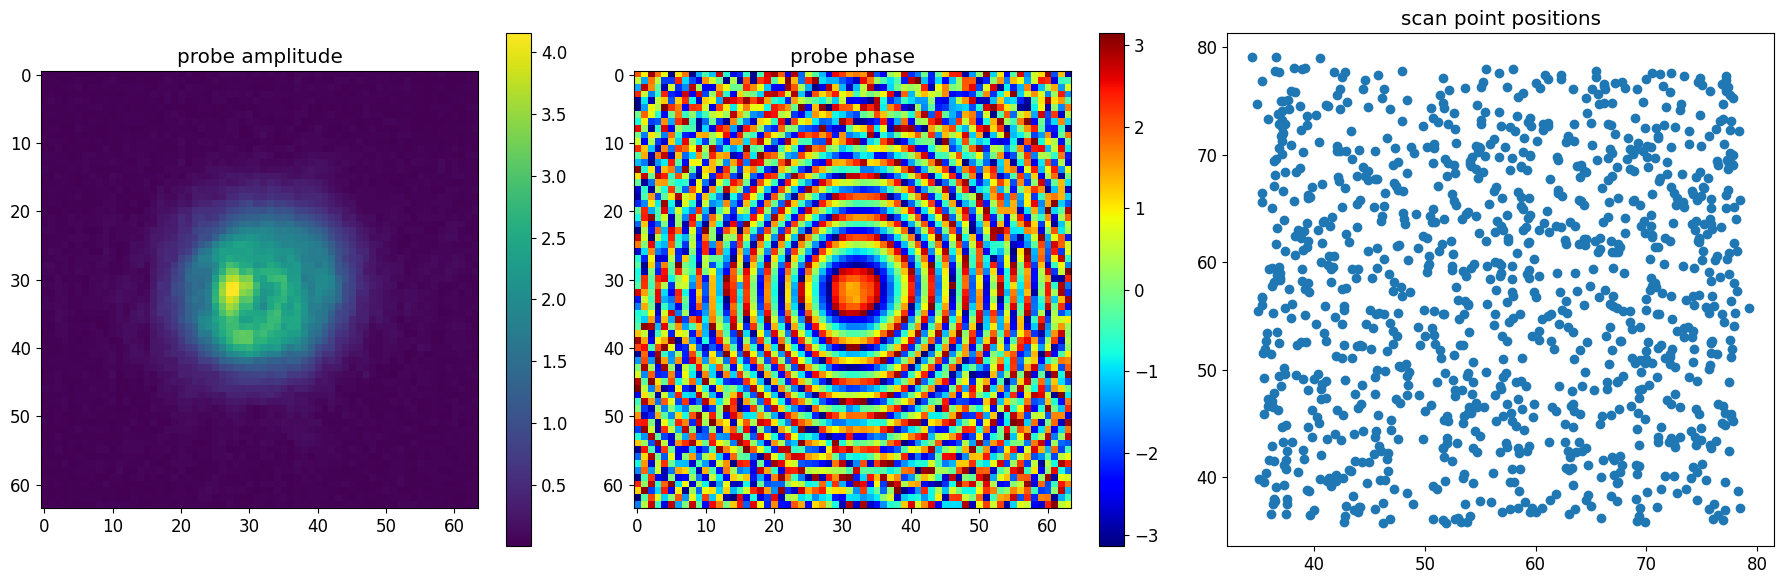

In [12]:
# Note the randomized scan point positions
probeshow(probeGuess, ptycho_dataset.test_data)

34/34 [==============================] - 6s 180ms/step
PADDING SIZE: 23
PADDING SIZE: 23


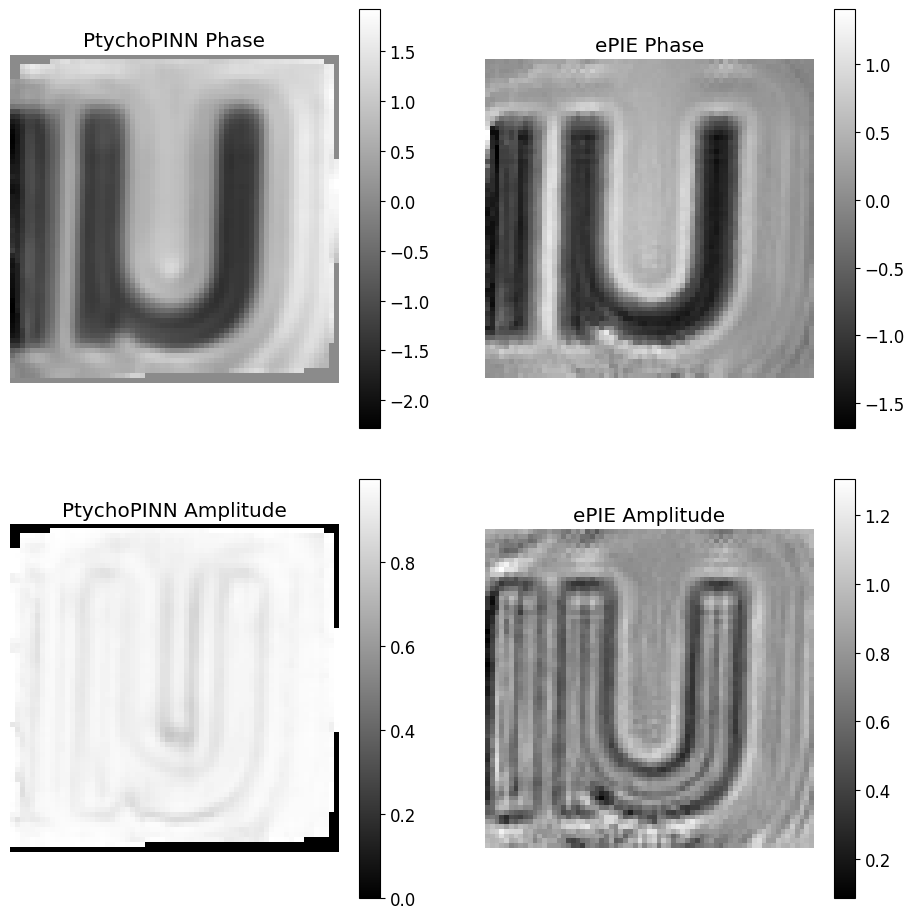

CPU times: user 37.4 s, sys: 1.5 s, total: 38.9 s
Wall time: 8.56 s


In [22]:
%%time
obj_tensor_full, global_offsets = reconstruct_image(test_data)
obj_image = hh.reassemble_position(obj_tensor_full, global_offsets[:, :, :, :], M = 20)

recon_amp_ptychopinn = np.absolute(obj_image)
recon_phase_ptychopinn = np.angle(obj_image)

ptycho_pinn_phase = recon_phase_ptychopinn[..., 0]
ptycho_pinn_amplitude = recon_amp_ptychopinn[..., 0]

epie_phase = crop_to_non_uniform_region_with_buffer(np.angle(obj['objectGuess']), buffer=-20)
epie_amplitude = crop_to_non_uniform_region_with_buffer(np.absolute(obj['objectGuess']), buffer=-20)

mk_epie_comparison2x2(ptycho_pinn_phase, epie_phase, ptycho_pinn_amplitude,epie_amplitude)

## Reconstruction for a single solution region:

In [25]:
# i = 200
# from ptycho import evaluation
# evaluation.summarize(i, pred_amp + 1, reconstructed_obj, X_test, Y_I_test, Y_phi_test,
#                      np.absolute(p.get('probe')[:, :, 0]), 0,
#                     crop = False);